# Практикум 2.7. 
# Дифференцирование функций многих переменных.
# Формула Тейлора
## 1. Частные производные функции нескольких переменных
### Пример 1.

In [1]:
import sympy as sp
x, y = sp.symbols('x y')
z = x**3 + y**2
print('dzdx:')
sp.pprint(sp.diff(z, x))
print('\ndzdy:')
sp.pprint(sp.diff(z, y))
print('\nd2zdx2:')
sp.pprint(sp.diff(z, x, 2))
print('\nd2zdxdy:')
sp.pprint(sp.diff(sp.diff(z, x), y))

dzdx:
   2
3⋅x 

dzdy:
2⋅y

d2zdx2:
6⋅x

d2zdxdy:
0


### Упражнение 1.
    а) Вычислите частные производные первого и второго порядка функции z(x,y) = cos(3*x+y**2)
    б) Найдите градиент функции  в точке f(x,y,z) = 2*y*(x**3) + x - z.

In [1]:
import sympy as sym

# Определяем символьные переменные x и y
x, y = sym.symbols('x y')

# Определяем функцию z(x,y) = cos(3*x+y**2)
z = sym.cos(3*x + y**2)

# Вычисляем частные производные первого порядка
dz_dx = sym.diff(z, x)
dz_dy = sym.diff(z, y)

# Вычисляем частные производные второго порядка
d2z_dx2 = sym.diff(z, x, x)
d2z_dy2 = sym.diff(z, y, y)
d2z_dxdy = sym.diff(z, x, y)

# Выводим результаты
print('dz/dx =', dz_dx)
print('dz/dy =', dz_dy)
print('d2z/dx2 =', d2z_dx2)
print('d2z/dy2 =', d2z_dy2)
print('d2z/dxdy =', d2z_dxdy)

dz/dx = -3*sin(3*x + y**2)
dz/dy = -2*y*sin(3*x + y**2)
d2z/dx2 = -9*cos(3*x + y**2)
d2z/dy2 = -2*(2*y**2*cos(3*x + y**2) + sin(3*x + y**2))
d2z/dxdy = -6*y*cos(3*x + y**2)


In [4]:
import sympy as sym

# Определяем символьные переменные x, y и z
x, y, z = sym.symbols('x y z')

# Определяем функцию f(x,y,z) = 2*y*(x**3) + x - z
f = 2*y*(x**3) + x - z

# Находим градиент функции f(x,y,z) в точке (1,2,-3)
gradient = sym.Matrix([sym.diff(f, var) for var in [x, y, z]])
gradient_value = gradient.subs([(x, 1), (y, 2), (z, -3)])

# Выводим результат
print('Градиент функции в точке (1,2,-3):', gradient_value)


Градиент функции в точке (1,2,-3): Matrix([[13], [2], [-1]])


### Пример 2

In [7]:
import sympy as sp


r, t = sp.symbols('r t')
# формулы перехода от декартовой системы координат к полярной
x = r * sp.cos(t)
y = r * sp.sin(t)
# вектор функций перехода для составления матрицы
A = sp.Matrix([[x, y]])
sp.pprint(A)

[r⋅cos(t)  r⋅sin(t)]


In [8]:
# матрица производных (транспонирована для более удобного составления)
B = sp.Matrix([[sp.diff(A,r)], [sp.diff(A,t)]])
sp.pprint(B.T)

⎡cos(t)  -r⋅sin(t)⎤
⎢                 ⎥
⎣sin(t)  r⋅cos(t) ⎦


In [9]:
# вычисление якобиана
sp.pprint(B.det())
sp.pprint(sp.simplify(B.det())) # упрощение выражения с помощью simplify

     2           2   
r⋅sin (t) + r⋅cos (t)
r


### Упражнение 2.
Вычислите якобиан перехода от декартовой системы координат к цилиндрической (переход осуществляется по формулам: x=r*cos(phi), y = r*sin(phi), z=z).

In [10]:
import sympy

# Объявляем переменные
x, y, z, r, phi = sympy.symbols('x y z r phi')

# Определяем координаты в цилиндрической системе координат
r = sympy.sqrt(x**2 + y**2)
phi = sympy.atan2(y, x)
z = z

# Вычисляем якобиан перехода
J = sympy.Matrix([[sympy.diff(r, x), sympy.diff(r, y), sympy.diff(r, z)],
                  [sympy.diff(phi, x), sympy.diff(phi, y), sympy.diff(phi, z)],
                  [sympy.diff(z, x), sympy.diff(z, y), sympy.diff(z, z)]])

# Выводим результат
print("Якобиан перехода от декартовой системы координат к цилиндрической:")
display(J.det())

Якобиан перехода от декартовой системы координат к цилиндрической:


1/sqrt(x**2 + y**2)

## 2. Дифференциалы функции нескольких переменных
### Упражнение 3.
    а) Найдите первый дифференциал  dz функции z=x*y**2 + 2*y - x**2 в точке (2, -1), если detX = 0.1, а detY=-0.2.
    б) Создайте функцию, вычисляющую первый дифференциал функции f(x,y) в точке (x0, y0) при приращения detX  detY. В число входных параметров включите функцию f, ее аргументы x, y, и их приращения detX, detY, заданные в символьном виде, координаты точки (x0, y0) и числовые значения приращений арументов. В число выходных араметров включите символьное выражение первого дифференциала в точке (x0, y0) и его числовое значение при заданных приращениях аргументов. Протестируйте функцию, используя данные пункта а).

In [22]:
import sympy

def first_differential(f, detX, detY, x0, y0):    
    # Вычисляем частные производные
    dfdx = sympy.diff(f, x)
    dfdy = sympy.diff(f, y)
    
    # Подставляем значения точки (x0, y0)
    dfdx = dfdx.subs([(x, x0), (y, y0)])
    dfdy = dfdy.subs([(x, x0), (y, y0)])    
    
    # Вычисляем первый дифференциал
    dz = dfdx * detX + dfdy * detY
    
    # Выводим результат
    print("Первый дифференциал функции f(x,y):")
    display(dz)
    print("Значение первого дифференциала в точке ({}, {}) при detX = {} и detY = {}: {}".format(x0, y0, detX, detY, dz.evalf()))
    
# Определяем функцию z
x, y = sympy.symbols('x y')
z = x * y**2 + 2 * y - x**2
# Вызываем функцию first_differential
first_differential(z, 0.1, -0.2,  2, -1)

Первый дифференциал функции f(x,y):


0.100000000000000

Значение первого дифференциала в точке (2, -1) при detX = 0.1 и detY = -0.2: 0.100000000000000


## 3. Приближенное вычисление значений функции с помощью формулы Тейлора

### Упражнение 5.
    а) Создайте функцию, раскладывающую функцию f(x,y) в точке (x0,y0) в ряд Тейлора до членов 1-го порядка включительно. В число входных параметров включите функцию f, ее аргументы x,y, и их приращения detX, detY, заданные в символьном виде, координаты точки (x0,y0) и числовые значения приращений аргументов. В число  выходных параметров включите символьное разложение p1(x,y) функции f(x,y) по формуле Тейлора в точке (x0,y0) y до членов 1-го порядка включительно, записанное через произвольные значения аргументов функции, а также приближенное значение функции f(x,y) в точке x=x0+detX, y=y0+detY (значение p1(x0+detX, y0+detY)) при указанных значения x0, y0, detX, detY.

    б) Используйте функцию из п. а) для вычисления приближенного значения функции z=f(x,y) в точке (x0,y0). Сравните полученный результат с точным значением этой функции в указанной точке.

    в) Постройте в одной системе координат в области x принадлежит [a,b], y принадлежит [c,d] поверхности z=f(x,y) и z=p1(x, y).

Замечание. 
Уравнение z=p1(x, y), или в развернутом виде z= f(x0,y0) + f'(x0,y0)(x-x0) + f'(x0,y0)(y-y0) является уравнением касательной плоскости к поверхности z=f(x,y) в точке с координатами (x0,y0).

In [31]:
import sympy

def taylor_series(f, x0, y0, detX, detY):  
    # Вычисляем значения функции и ее частных производных в точке (x0, y0)
    f0 = f.subs([(x, x0), (y, y0)])
    
    dfdx = sympy.diff(f, x).subs([(x, x0), (y, y0)])
    dfdy = sympy.diff(f, y).subs([(x, x0), (y, y0)])
    
    # Вычисляем первый член ряда Тейлора
    p1 = f0 + dfdx * (x - x0) + dfdy * (y - y0)
    
    # Выводим результат
    print("Разложение функции f(x,y) в ряд Тейлора до членов 1-го порядка:")
    display(p1)
    print("Приближенное значение функции f(x,y) в точке ({}, {}) при detX = {} и detY = {}: {}".format(x0 + detX, y0 + detY, detX, detY, p1.subs([(x, x0 + detX), (y, y0 + detY)]).evalf()))

In [32]:
# Определяем функцию z
x, y = sympy.symbols('x y')

z = x * y**2 + 2 * y - x**2

# Вычисляем приближенное значение функции z в точке (x0+detX, y0+detY)
taylor_series(z, 2, -1, 0.1, -0.2)

Разложение функции f(x,y) в ряд Тейлора до членов 1-го порядка:


-3*x - 2*y

Приближенное значение функции f(x,y) в точке (2.1, -1.2) при detX = 0.1 и detY = -0.2: -3.90000000000000


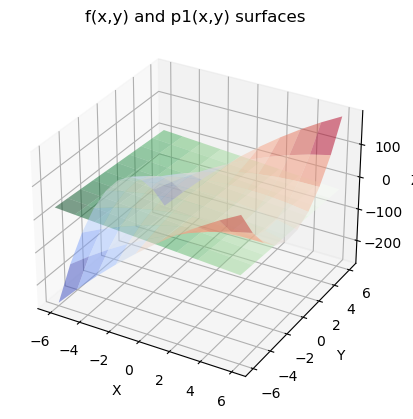

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x, y):
    return x * y**2 + 2 * y - x**2

def p1(x, y):
    return -3*x-2*y

a, b, c, d = -6,6,-6,6

x = np.linspace(a, b, 10)
y = np.linspace(c, d, 10)
X, Y = np.meshgrid(x, y)

Z = f(X, Y)
P = p1(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.5, cmap='coolwarm')
ax.plot_surface(X, Y, P, alpha=0.5, cmap='Greens')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('f(x,y) and p1(x,y) surfaces')
plt.show()

### Упражнение 6.
а) Создайте функцию, раскладывающую функцию f(x,y) в точке (x0,y0) по формуле Тейлора до членов 2-го прядка включительно. В число входных параметров включите функцию f,и приращения detX, detY, заданные в символьном виде, координаты точки (x0,y0) и числовые значения приращений аргументов. В число выходных параметров включите символьное разложение p2(x,y) функции f(x,y) по формуле Тейлора в точке (x0,y0) до членов 2-го порядка включительно, записанное через произвольные значения аргументов функции, а также приближенное значение функции f(x,y) в точке x=x0+detX, y=y0+detY (значение p2(x0+detX, y0+detY)) при указанных значения x0, y0, detX, detY.

б) Используйте функцию из п. а) для вычисления приближенного значения функции z=f(x,y) в точке (x0,y0). Сравните полученный результат с точным значением этой функции в указанной точке и с ее приближенным значением, полученным по формуле Тейлора до членов 1-го порядка.

в) Постройте в одной системе координат в области x принадлежит [a,b], y принадлежит [c,d] поверхности z=f(x,y) и z=p2(x, y).

In [39]:
from sympy import *

def taylor(f, x0, y0, detX, detY):
    
    dfdx = diff(f, x).subs([(x, x0), (y, y0)])
    dfdy = diff(f, y).subs([(x, x0), (y, y0)])
        
    d2fdx2 = diff(f, x, 2).subs([(x, x0), (y, y0)])
    d2fdy2 = diff(f, y, 2).subs([(x, x0), (y, y0)])
    d2fdxdy = diff(f, x, y).subs([(x, x0), (y, y0)])
    
    p2 = f.subs([(x, x0), (y, y0)]) + dfdx*(x-x0) + dfdy*(y-y0) + Rational(1,2)*d2fdx2*(x-x0)**2 +\
        Rational(1,2)*d2fdy2*(y-y0)**2 + d2fdxdy*(x-x0)*(y-y0)
    
    approx_val = p2.subs([(x, x0+detX), (y, y0+detY)])
    return (p2, approx_val)

In [41]:
x, y = symbols('x y')

f_xy = (2*x**2 + y**2)**4

x0, y0 = 0.8, 2.2
detX, detY = 0.1, 0.2

# Вычисляем приближенное значение функции до членов 2-го порядка включительно
p2, approx_val = taylor(f_xy, x0, y0, detX, detY)

# Вычисляем точное значение функции в заданной точке
exact_val = f_xy.subs([(x, x0+detX), (y, y0+detY)])

# Вычисляем приближенное значение функции до членов 1-го порядка
p1 = f_xy.subs([(x, x0), (y, y0)]) + diff(f_xy, x).subs([(x, x0), (y, y0)])*detX + \
    diff(f_xy, y).subs([(x, x0), (y, y0)])*detY

# Выводим результаты
print("Приближенное значение функции до членов 2-го порядка включительно: ", approx_val.evalf())
print("Точное значение функции в заданной точке: ", exact_val.evalf())
print("Приближенное значение функции до членов 1-го порядка: ", p1.evalf())

Приближенное значение функции до членов 2-го порядка включительно:  2881.71157248000
Точное значение функции в заданной точке:  2966.37086736000
Приближенное значение функции до членов 1-го порядка:  2503.09253376000


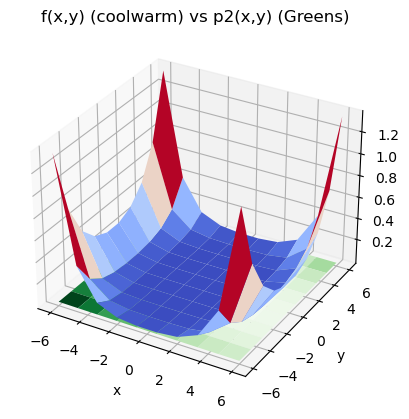

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x, y = symbols('x y')
f_xy = (2*x**2 + y**2)**4

p2_xy, approx_val = taylor(f_xy, x0, y0, detX, detY)

# Определяем область построения
a, b, c, d = -6,6,-6,6
x_vals = np.linspace(a, b, 10)
y_vals = np.linspace(c, d, 10)

f_vals = np.array([[f_xy.subs([(x, xi), (y, yi)]) for xi in x_vals] for yi in y_vals])
p2_vals = np.array([[p2_xy.subs([(x, xi), (y, yi)]) for xi in x_vals] for yi in y_vals])

x, y = np.meshgrid(x_vals, y_vals)

# Строим поверхности
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, f_vals, cmap='coolwarm')
ax.plot_surface(x, y, p2_vals, cmap='Greens')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('f(x,y) (coolwarm) vs p2(x,y) (Greens)')
plt.show()